In [44]:
!pip install numpy==1.23.5
!pip install statsmodels
!pip install pmdarima

  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [46]:
# Ler o CSV
dataset = pd.read_csv('data.csv', delimiter=',', parse_dates=['saledate'])

# Garantir que MA seja float
dataset['MA'] = dataset['MA'].astype(float)

# Filtrar por tipo
dataset_house = dataset[dataset['type'] == 'house']
dataset_unit = dataset[dataset['type'] == 'unit']

# Separar por número de quartos (1 a 5)
datasets_quartos_casas1 = dataset_house[dataset_house['bedrooms'] == 1]
datasets_quartos_casas2 = dataset_house[dataset_house['bedrooms'] == 2]
datasets_quartos_casas3 = dataset_house[dataset_house['bedrooms'] == 3]
datasets_quartos_casas4 = dataset_house[dataset_house['bedrooms'] == 4]
datasets_quartos_casas5 = dataset_house[dataset_house['bedrooms'] == 5]

datasets_quartos_ap1 = dataset_unit[dataset_unit['bedrooms'] == 1]
datasets_quartos_ap2 = dataset_unit[dataset_unit['bedrooms'] == 2]
datasets_quartos_ap3 = dataset_unit[dataset_unit['bedrooms'] == 3]
datasets_quartos_ap4 = dataset_unit[dataset_unit['bedrooms'] == 4]
datasets_quartos_ap5 = dataset_unit[dataset_unit['bedrooms'] == 5]

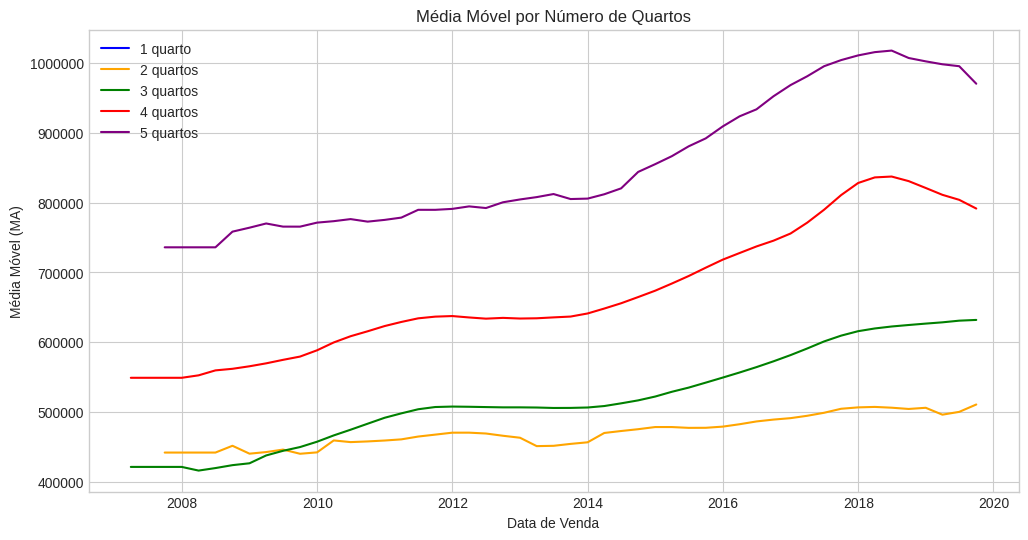

In [47]:
# Plotar casas
plt.figure(figsize=(12, 6))

# Plotando cada dataset
plt.plot(datasets_quartos_casas1['saledate'], datasets_quartos_casas1['MA'], label='1 quarto', color='blue')
plt.plot(datasets_quartos_casas2['saledate'], datasets_quartos_casas2['MA'], label='2 quartos', color='orange')
plt.plot(datasets_quartos_casas3['saledate'], datasets_quartos_casas3['MA'], label='3 quartos', color='green')
plt.plot(datasets_quartos_casas4['saledate'], datasets_quartos_casas4['MA'], label='4 quartos', color='red')
plt.plot(datasets_quartos_casas5['saledate'], datasets_quartos_casas5['MA'], label='5 quartos', color='purple')

# Melhorias no gráfico
plt.title('Média Móvel por Número de Quartos')
plt.xlabel('Data de Venda')
plt.ylabel('Média Móvel (MA)')
plt.legend()
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')
plt.show()

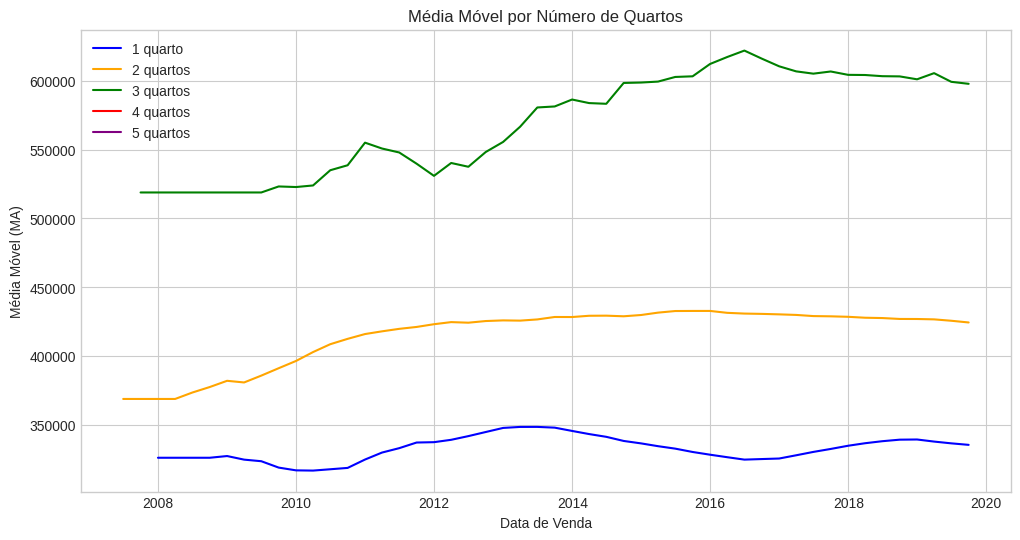

In [48]:
# Plotar unidades
plt.figure(figsize=(12, 6))

# Plotando cada dataset
plt.plot(datasets_quartos_ap1['saledate'], datasets_quartos_ap1['MA'], label='1 quarto', color='blue')
plt.plot(datasets_quartos_ap2['saledate'], datasets_quartos_ap2['MA'], label='2 quartos', color='orange')
plt.plot(datasets_quartos_ap3['saledate'], datasets_quartos_ap3['MA'], label='3 quartos', color='green')
plt.plot(datasets_quartos_ap4['saledate'], datasets_quartos_ap4['MA'], label='4 quartos', color='red')
plt.plot(datasets_quartos_ap5['saledate'], datasets_quartos_ap5['MA'], label='5 quartos', color='purple')

# Melhorias no gráfico
plt.title('Média Móvel por Número de Quartos')
plt.xlabel('Data de Venda')
plt.ylabel('Média Móvel (MA)')
plt.legend()
plt.grid(True)

plt.show()

In [49]:
def plot_decomposition(df, quartos, tipo='casa', period=4):
    if df.empty:
        return
    serie = df.sort_values('saledate').set_index('saledate')
    decomposition = seasonal_decompose(serie['MA'], model='additive', period=period)
    decomposition.plot()
    plt.suptitle(f'Decomposição Aditiva - {tipo} com {quartos} quarto(s)', fontsize=16)
    plt.tight_layout()
    plt.show()

# Decomposição Casas

In [50]:
#plot_decomposition(datasets_quartos_casas1, quartos=1, tipo='casa') Não tem casa de 1 quarto
#plot_decomposition(datasets_quartos_casas2, quartos=2, tipo='casa')
#plot_decomposition(datasets_quartos_casas3, quartos=3, tipo='casa')
#plot_decomposition(datasets_quartos_casas4, quartos=4, tipo='casa')
#plot_decomposition(datasets_quartos_casas5, quartos=5, tipo='casa')

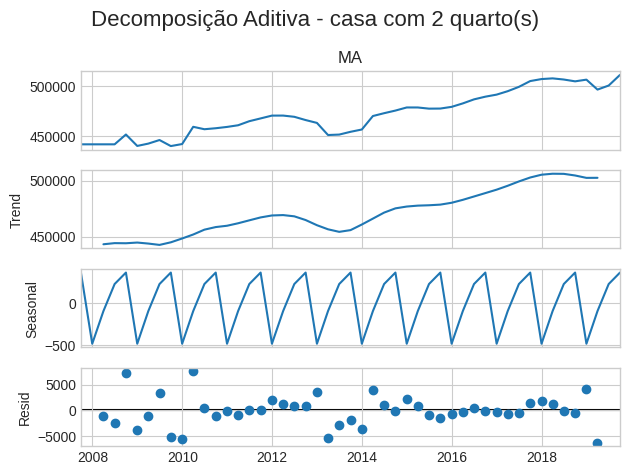

In [51]:
plot_decomposition(datasets_quartos_casas2, quartos=2, tipo='casa')

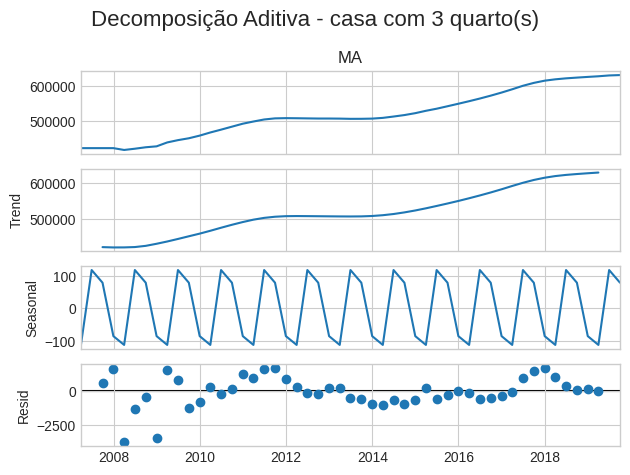

In [52]:
plot_decomposition(datasets_quartos_casas3, quartos=3, tipo='casa')

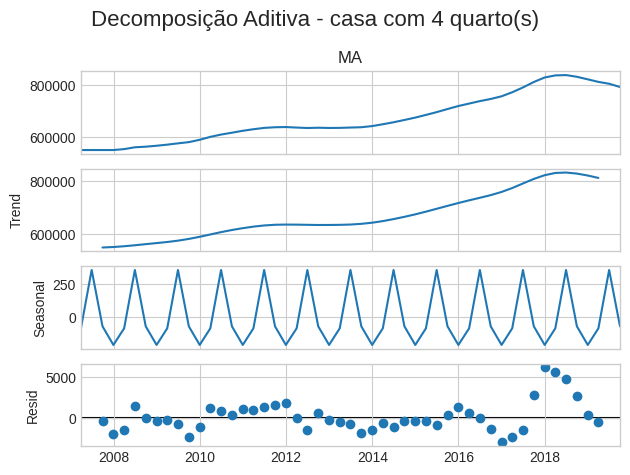

In [53]:
plot_decomposition(datasets_quartos_casas4, quartos=4, tipo='casa')

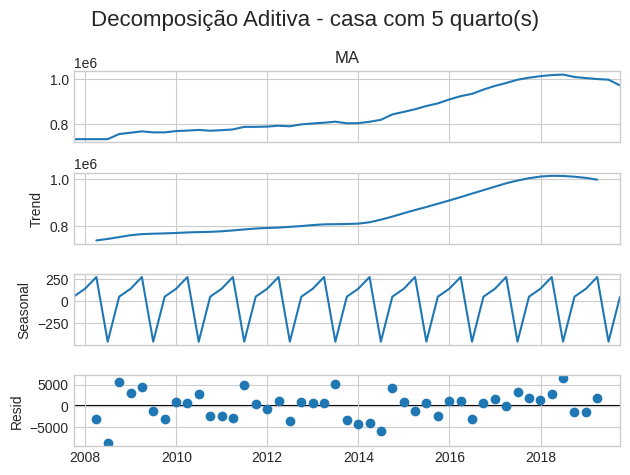

In [54]:
plot_decomposition(datasets_quartos_casas5, quartos=5, tipo='casa')

# Decomposição Unidades

In [55]:
#plot_decomposition(datasets_quartos_ap1, quartos=1, tipo='unidade')
#plot_decomposition(datasets_quartos_ap2, quartos=2, tipo='unidade')
#plot_decomposition(datasets_quartos_ap3, quartos=3, tipo='unidade')
#plot_decomposition(datasets_quartos_ap4, quartos=4, tipo='unidade') Não tem unidade de 4 quarto
#plot_decomposition(datasets_quartos_ap5, quartos=5, tipo='unidade') Não tem unidade de 5 quarto

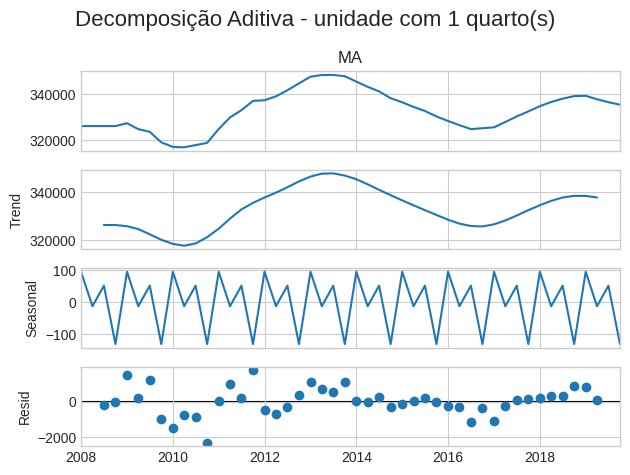

In [56]:
plot_decomposition(datasets_quartos_ap1, quartos=1, tipo='unidade')

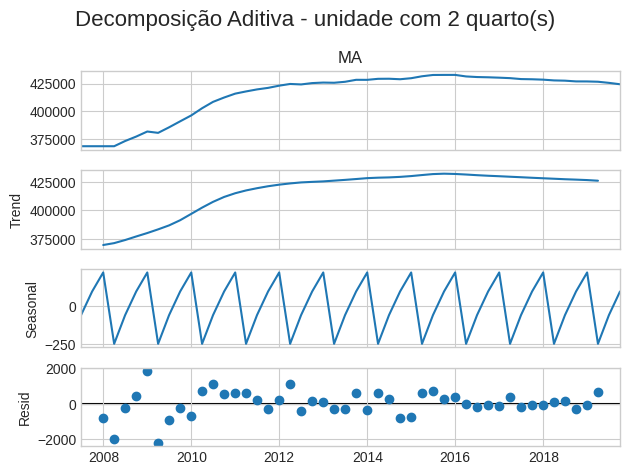

In [57]:
plot_decomposition(datasets_quartos_ap2, quartos=2, tipo='unidade')

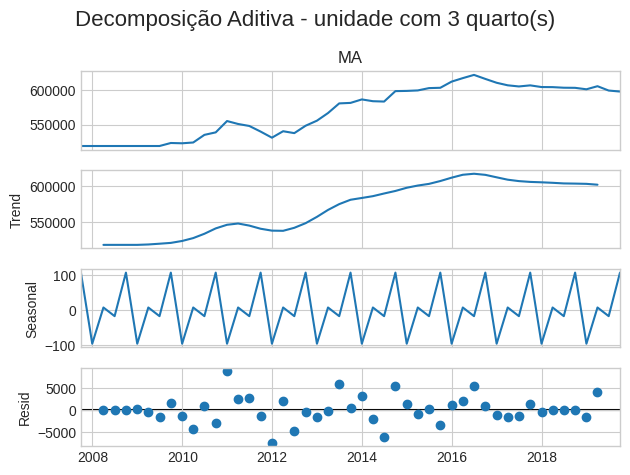

In [58]:
plot_decomposition(datasets_quartos_ap3, quartos=3, tipo='unidade')

In [59]:
def plot_forecast_overlaid(datasets_quartos, tipo='casa', steps=12):
    plt.figure(figsize=(12, 6))

    for quartos, df in datasets_quartos.items():
        if df.empty:
            continue

        df_sorted = df.sort_values('saledate').copy()
        df_sorted.set_index('saledate', inplace=True)
        ts = df_sorted['MA']

        model = auto_arima(ts, seasonal=True, m=4, stepwise=True, suppress_warnings=True)
        forecast = model.predict(n_periods=steps)

        freq = (ts.index[1] - ts.index[0]).days
        last_date = ts.index[-1]
        future_index = [last_date + timedelta(days=freq*(i+1)) for i in range(steps)]
        future_index = pd.to_datetime(future_index)

        plt.plot(ts.index, ts, label=f'{quartos} quarto(s) - histórico', linewidth=2)
        plt.plot(future_index, forecast, '--', label=f'{quartos} quarto(s) - previsão', linewidth=2)

    plt.title(f'{tipo.capitalize()} - Previsão ARIMA de Todos os Quartos', fontsize=14)
    plt.xlabel('Data')
    plt.ylabel('Média Móvel (MA)')
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.gca().yaxis.set_major_formatter(ScalarFormatter())
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

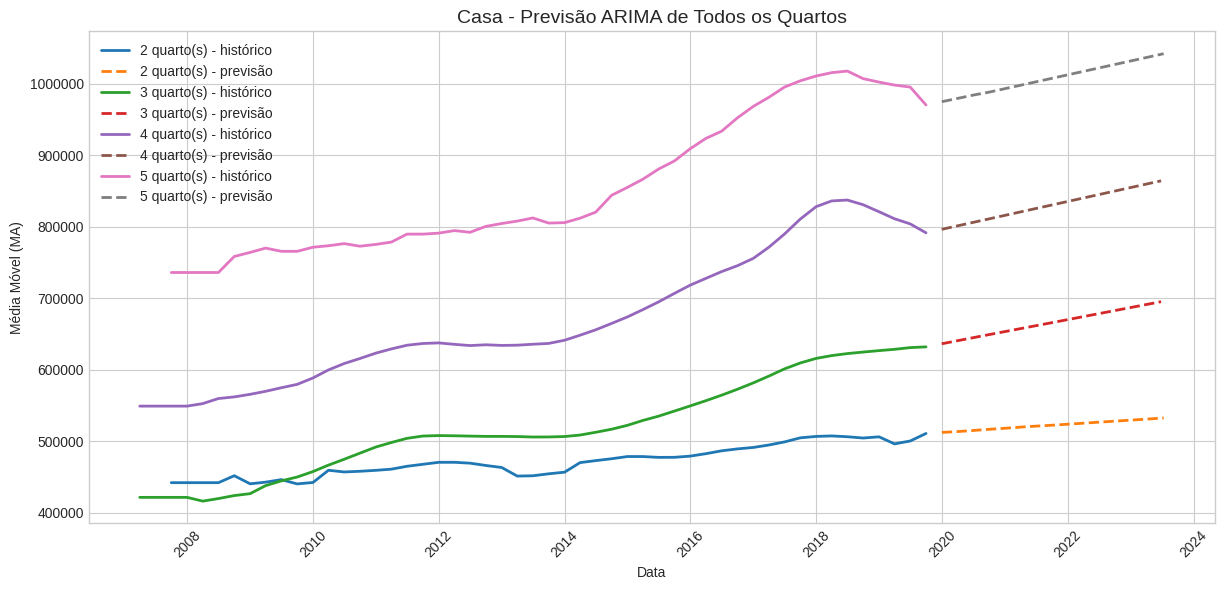

In [60]:
datasets_quartos_casas_dict = {
    1: datasets_quartos_casas1,
    2: datasets_quartos_casas2,
    3: datasets_quartos_casas3,
    4: datasets_quartos_casas4,
    5: datasets_quartos_casas5
}

plot_forecast_overlaid(datasets_quartos_casas_dict, tipo='casa', steps=15)


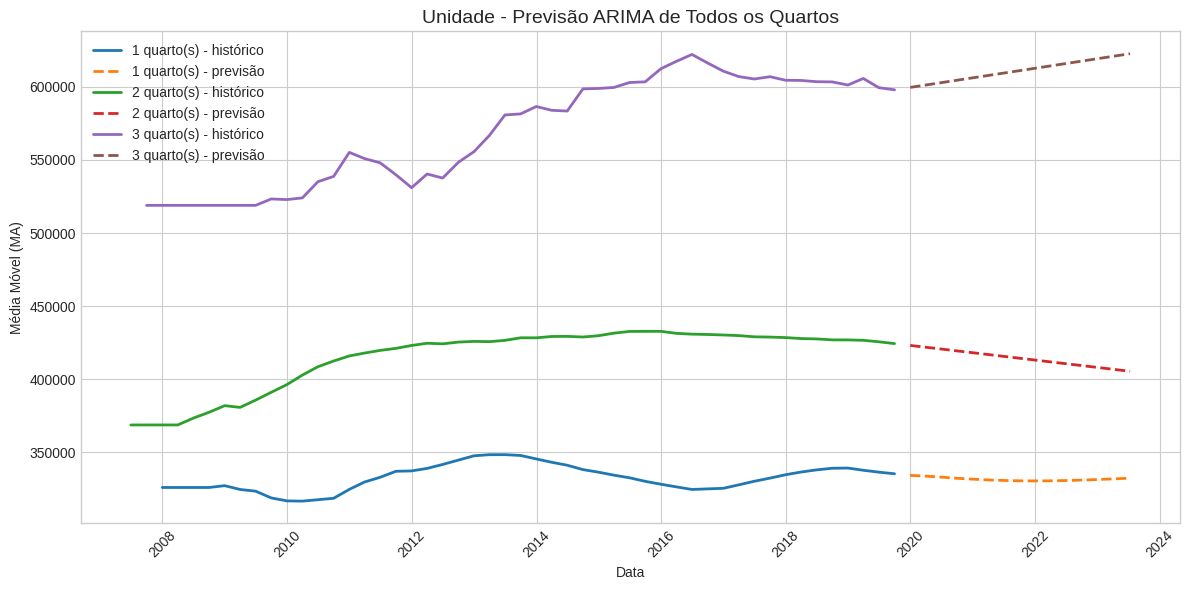

In [61]:
datasets_quartos_unidades_dict = {
    1: datasets_quartos_ap1,
    2: datasets_quartos_ap2,
    3: datasets_quartos_ap3,
    4: datasets_quartos_ap4,
    5: datasets_quartos_ap5
}

plot_forecast_overlaid(datasets_quartos_unidades_dict, tipo='unidade', steps=15)


# TESTE

Comparando os Modelos (Isso pode levar alguns instantes)...

Processando: house - 2 quartos...
Processando: house - 3 quartos...
Processando: house - 4 quartos...
Processando: house - 5 quartos...
Processando: unit - 1 quartos...
Processando: unit - 2 quartos...
Processando: unit - 3 quartos...
TABELA DE RESULTADOS (Menor Erro Vence)


,Tipo,Quartos,Vencedor,Erro HW,Erro SARIMA,Erro ARIMA
0,HOUSE,2,ARIMA,6770.49,15915.89,3357.18
1,HOUSE,3,ARIMA,24845.96,24842.75,3124.15
2,HOUSE,4,ARIMA,86978.12,60649.88,28225.69
3,HOUSE,5,ARIMA,59786.19,62664.99,30383.48
4,UNIT,1,SARIMA,6721.63,3744.98,4746.42
5,UNIT,2,Holt-Winters,436.35,564.07,3806.66
6,UNIT,3,ARIMA,14758.05,5008.41,4417.03


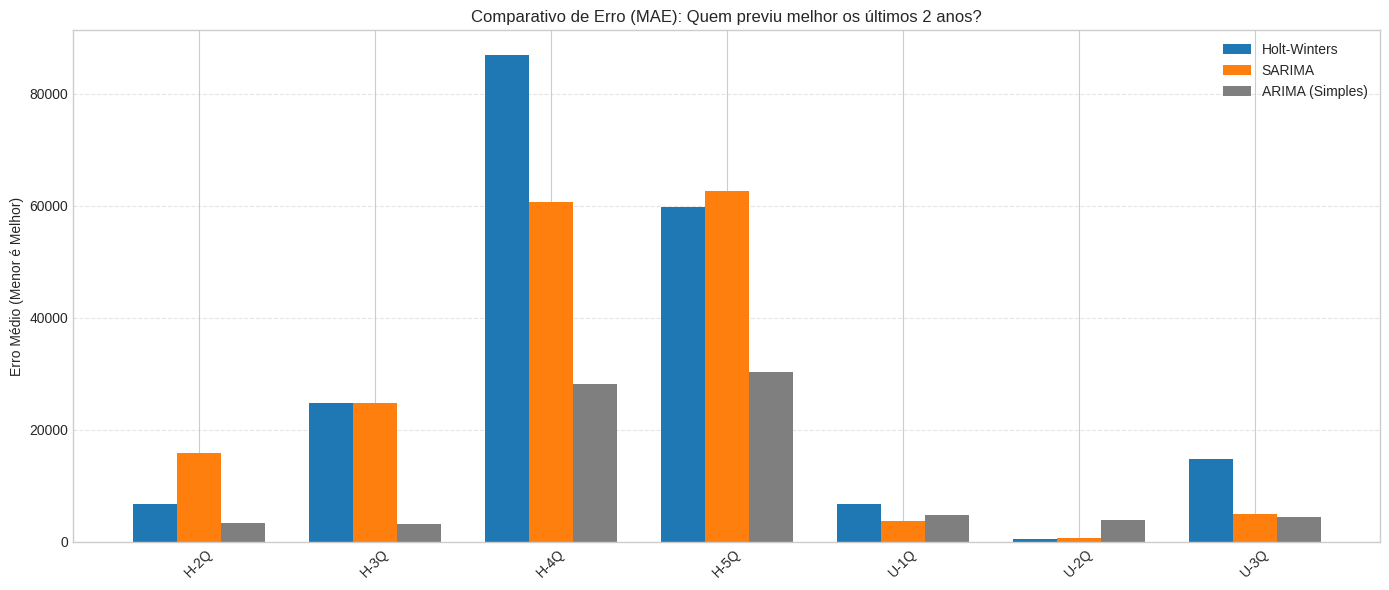


PLACAR FINAL (Vitórias)
Vencedor
ARIMA           5
SARIMA          1
Holt-Winters    1
Name: count, dtype: int64


In [62]:
# ==============================================================================
# COMPARAÇÃO DE MODELOS: Holt-Winters vs ARIMA vs SARIMA
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import warnings

# Configurações para manter o padrão visual
warnings.filterwarnings("ignore")
plt.style.use('seaborn-v0_8-whitegrid')

# Lista para armazenar o placar final
placar_geral = []

# Identificar combinações de Tipo e Quartos
df = pd.read_csv('data.csv', delimiter=',', parse_dates=['saledate'])
tipos = df['type'].unique()
quartos_lista = sorted(df['bedrooms'].unique())

print(f"Comparando os Modelos (Isso pode levar alguns instantes)...\n")

for tipo_imovel in tipos:
    for n_quartos in quartos_lista:

        # Filtragem dos Dados
        mask = (df['type'] == tipo_imovel) & (df['bedrooms'] == n_quartos)
        df_filtro = df[mask]

        if df_filtro.empty:
            continue

        # Preparação da Série Temporal
        ts = df_filtro.groupby('saledate')['MA'].mean().asfreq('Q-DEC')

        # Validação mínima de tamanho
        if len(ts) < 16:
            continue

        # Divisão Treino vs Teste
        n_teste = 8
        treino = ts.iloc[:-n_teste]
        teste = ts.iloc[-n_teste:]

        print(f"Processando: {tipo_imovel} - {n_quartos} quartos...")

        # ODELO: Holt-Winters
        modelo_hw = ExponentialSmoothing(
            treino,
            trend='add',
            seasonal='add',
            seasonal_periods=4
        ).fit()
        pred_hw = modelo_hw.forecast(steps=n_teste)
        mae_hw = mean_absolute_error(teste, pred_hw)

        # MODELO: SARIMA
        modelo_sarima = ARIMA(
            treino,
            order=(1, 1, 1),
            seasonal_order=(1, 1, 1, 4)
        ).fit()
        pred_sarima = modelo_sarima.forecast(steps=n_teste)
        mae_sarima = mean_absolute_error(teste, pred_sarima)

        # MODELO: ARIMA
        modelo_arima = ARIMA(
            treino,
            order=(1, 1, 1)
        ).fit()
        pred_arima = modelo_arima.forecast(steps=n_teste)
        mae_arima = mean_absolute_error(teste, pred_arima)

        # Melhor modelo
        erros = {'Holt-Winters': mae_hw, 'SARIMA': mae_sarima, 'ARIMA': mae_arima}
        vencedor = min(erros, key=erros.get)

        placar_geral.append({
            'Tipo': tipo_imovel.upper(),
            'Quartos': n_quartos,
            'Vencedor': vencedor,
            'Erro HW': round(mae_hw, 2),
            'Erro SARIMA': round(mae_sarima, 2),
            'Erro ARIMA': round(mae_arima, 2)
        })

# APRESENTAÇÃO DOS RESULTADOS

# Criar DataFrame do Placar
df_placar = pd.DataFrame(placar_geral)

if not df_placar.empty:
    print(f"{'='*80}\nTABELA DE RESULTADOS (Menor Erro Vence)\n{'='*80}")

    # Exibir tabela colorida (se estiver no Jupyter/Colab)
    display(df_placar[['Tipo', 'Quartos', 'Vencedor', 'Erro HW', 'Erro SARIMA', 'Erro ARIMA']])

    # Gráfico de Barras Comparativo
    plt.figure(figsize=(14, 6))

    labels = df_placar.apply(lambda x: f"{x['Tipo'][0]}-{x['Quartos']}Q", axis=1)
    x = np.arange(len(labels))
    width = 0.25

    plt.bar(x - width, df_placar['Erro HW'], width, label='Holt-Winters', color='#1f77b4')
    plt.bar(x, df_placar['Erro SARIMA'], width, label='SARIMA', color='#ff7f0e')
    plt.bar(x + width, df_placar['Erro ARIMA'], width, label='ARIMA (Simples)', color='#7f7f7f')

    plt.title('Comparativo de Erro (MAE): Quem previu melhor os últimos 2 anos?')
    plt.ylabel('Erro Médio (Menor é Melhor)')
    plt.xticks(x, labels, rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # Resumo Final
    print(f"\n{'='*30}\nPLACAR FINAL (Vitórias)\n{'='*30}")
    print(df_placar['Vencedor'].value_counts())

else:
    print("Não foram encontrados dados suficientes para realizar a comparação.")